## Student Performance Indicator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading datasets

In [3]:
df = pd.read_csv("Dataset/student.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Getting shape, missing values, duplicates, info and it's summary

In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### **Conclusion** : There is no any `missing` or `duplicated` values in the dataset.

#### Finding some other insights

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
for i, column in enumerate(df.columns):
    print(f"{i+1}.  Categories in {column.upper()} variable are:   ", end=" ")
    print(df[column].unique())
    if i == 4:
        break

1.  Categories in GENDER variable are:    ['female' 'male']
2.  Categories in RACE_ETHNICITY variable are:    ['group B' 'group C' 'group A' 'group D' 'group E']
3.  Categories in PARENTAL_LEVEL_OF_EDUCATION variable are:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
4.  Categories in LUNCH variable are:    ['standard' 'free/reduced']
5.  Categories in TEST_PREPARATION_COURSE variable are:    ['none' 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"The number of NUMERICAL Feature is {len(numeric_features)}. The features are as: {numeric_features}")
print(f"\nThe number of CATEGORICAL Feature is {len(categorical_features)}. The features are as: {categorical_features}")

The number of NUMERICAL Feature is 3. The features are as: ['math_score', 'reading_score', 'writing_score']

The number of CATEGORICAL Feature is 5. The features are as: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### adding `Target Features`

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3

## Data Analysis

#### Univariate Analysis

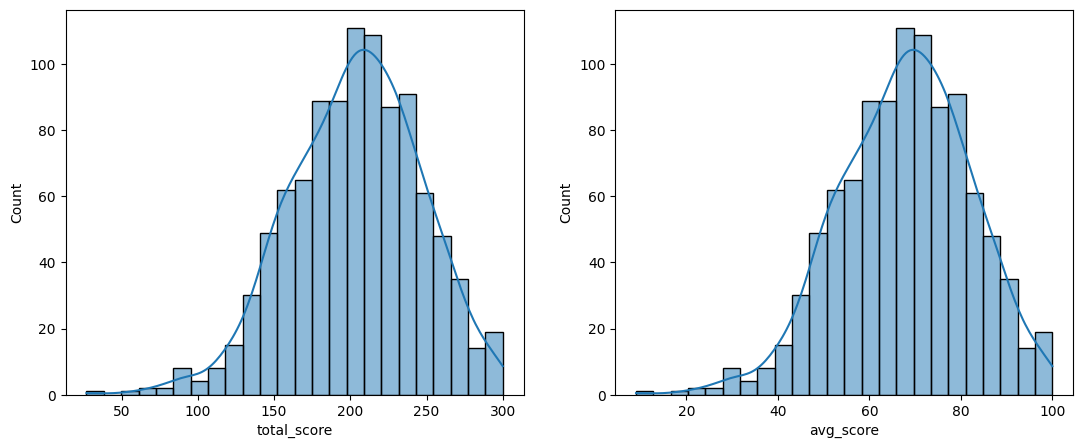

In [13]:
# total score and average score analysis

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.histplot(df['total_score'], kde=True, ax=ax[0])
sns.histplot(df['avg_score'], kde=True, ax=ax[1])
plt.show()

**Conclusion**: The both data is seems like `Normally Distributed`

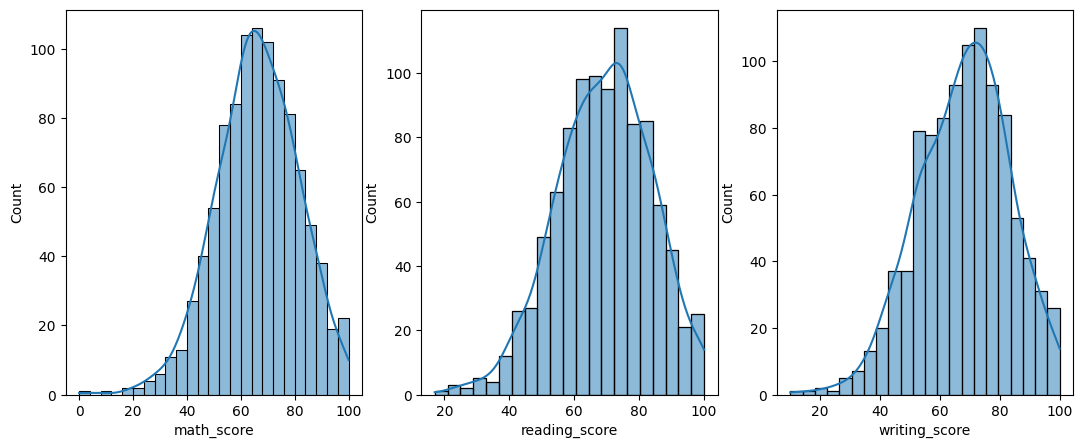

In [14]:
# Math, Reading and Writing score analysis

fig, ax = plt.subplots(1, 3, figsize=(13, 5))
sns.histplot(df['math_score'], kde=True, ax=ax[0])
sns.histplot(df['reading_score'], kde=True, ax=ax[1])
sns.histplot(df['writing_score'], kde=True, ax=ax[2])
plt.show()

**Conclusion**: This data is seems to be `Normally Distributed`

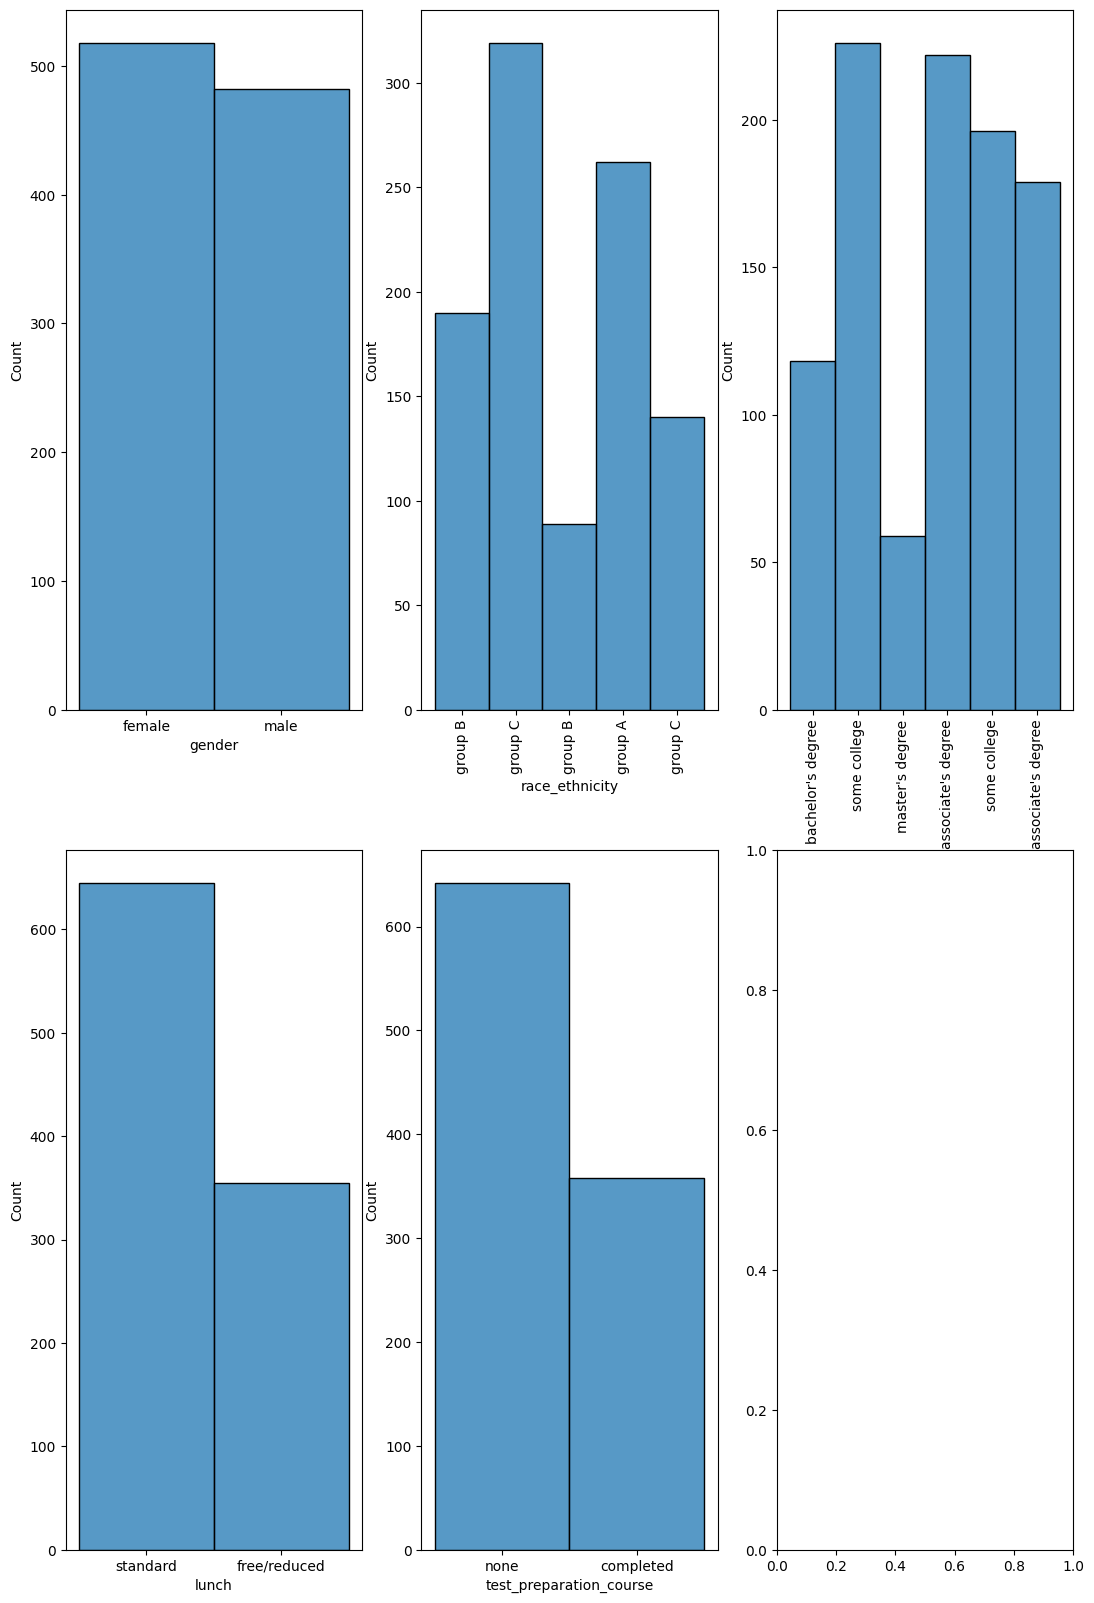

In [68]:
fig, ax = plt.subplots(2, 3, figsize=(13, 20))

sns.histplot(df['gender'], ax=ax[0, 0])
sns.histplot(df['race_ethnicity'], ax=ax[0, 1])
sns.histplot(df['parental_level_of_education'], ax=ax[0, 2])
sns.histplot(df['lunch'], ax=ax[1, 0])
sns.histplot(df['test_preparation_course'], ax=ax[1, 1])

ax[0, 1].set_xticklabels(df['race_ethnicity'], rotation=90)
ax[0, 2].set_xticklabels(df['parental_level_of_education'], rotation=90)
plt.show()

**Conclusion**: `Gender` is almost equally distributed over entire data.

#### Bivariate Analysis

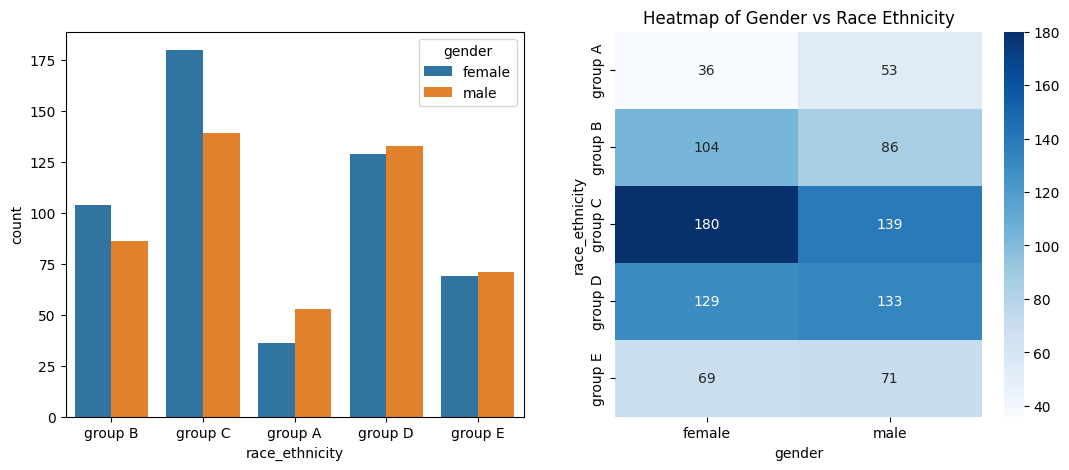

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(data=df, x='race_ethnicity', hue='gender', ax=ax[0])
plt.title('Count Plot of Gender and Race Ethnicity')

ct = pd.crosstab(df['race_ethnicity'], df['gender'])
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d', ax=ax[1])
plt.title('Heatmap of Gender vs Race Ethnicity')

plt.show()

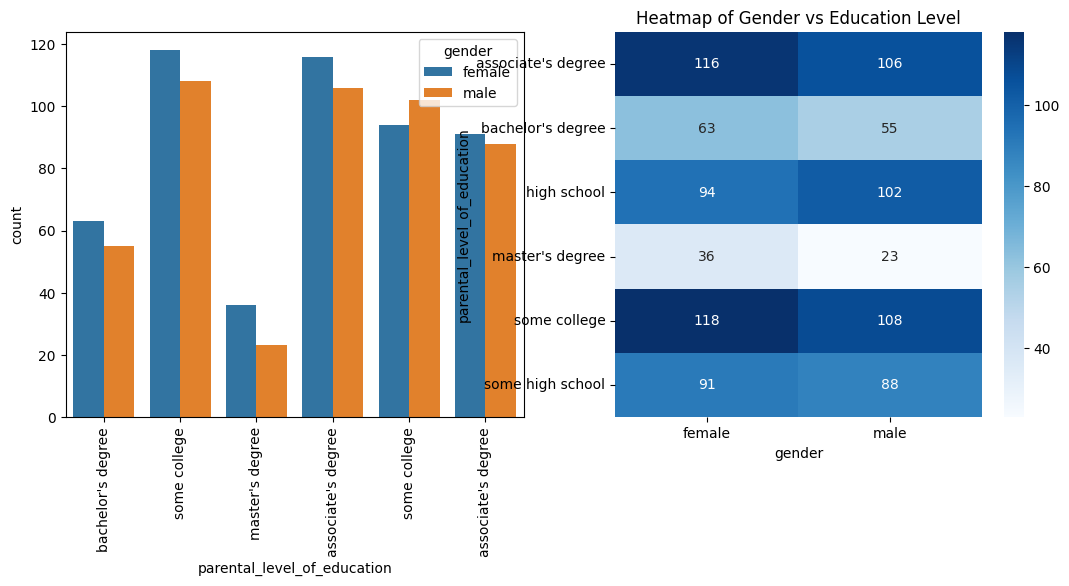

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(data=df, x='parental_level_of_education', hue='gender', ax=ax[0])
ax[0].set_xticklabels(df['parental_level_of_education'], rotation=90)
plt.title('Count Plot of Gender and Education Level')

ct = pd.crosstab(df['parental_level_of_education'], df['gender'])
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d', ax=ax[1])
plt.title('Heatmap of Gender vs Education Level')

plt.show()

<Axes: xlabel='gender', ylabel='math_score'>

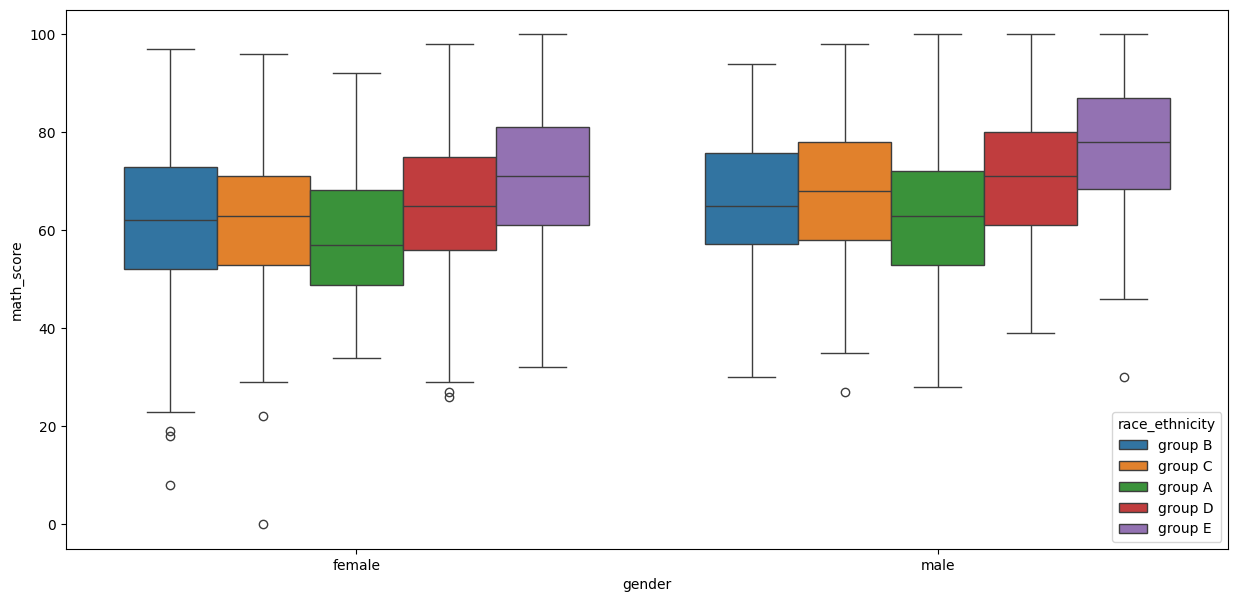

In [90]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='gender', y='math_score', hue='race_ethnicity')

<Axes: xlabel='gender', ylabel='math_score'>

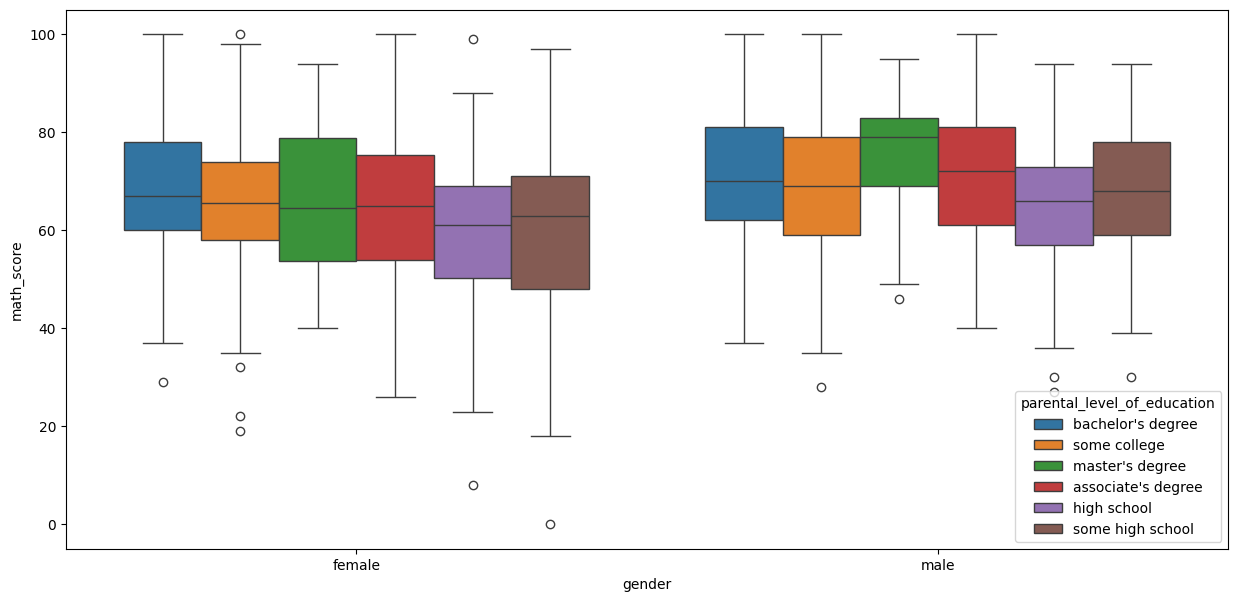

In [91]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='gender', y='math_score', hue='parental_level_of_education')

<Axes: xlabel='gender', ylabel='math_score'>

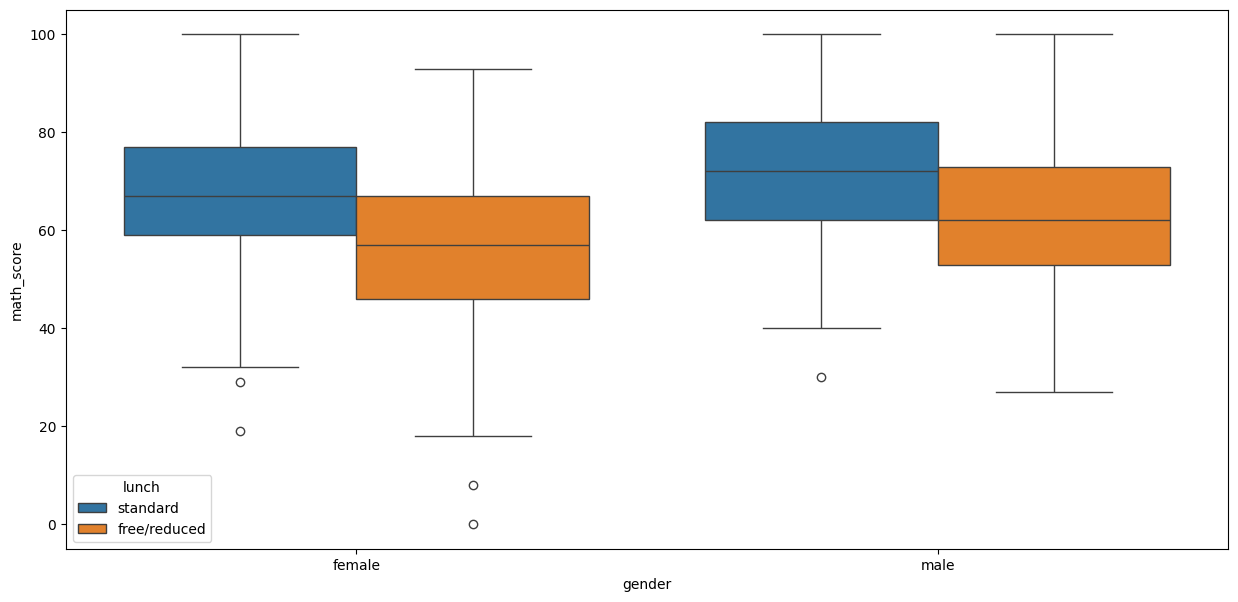

In [92]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='gender', y='math_score', hue='lunch')

In [93]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

<Axes: xlabel='gender', ylabel='math_score'>

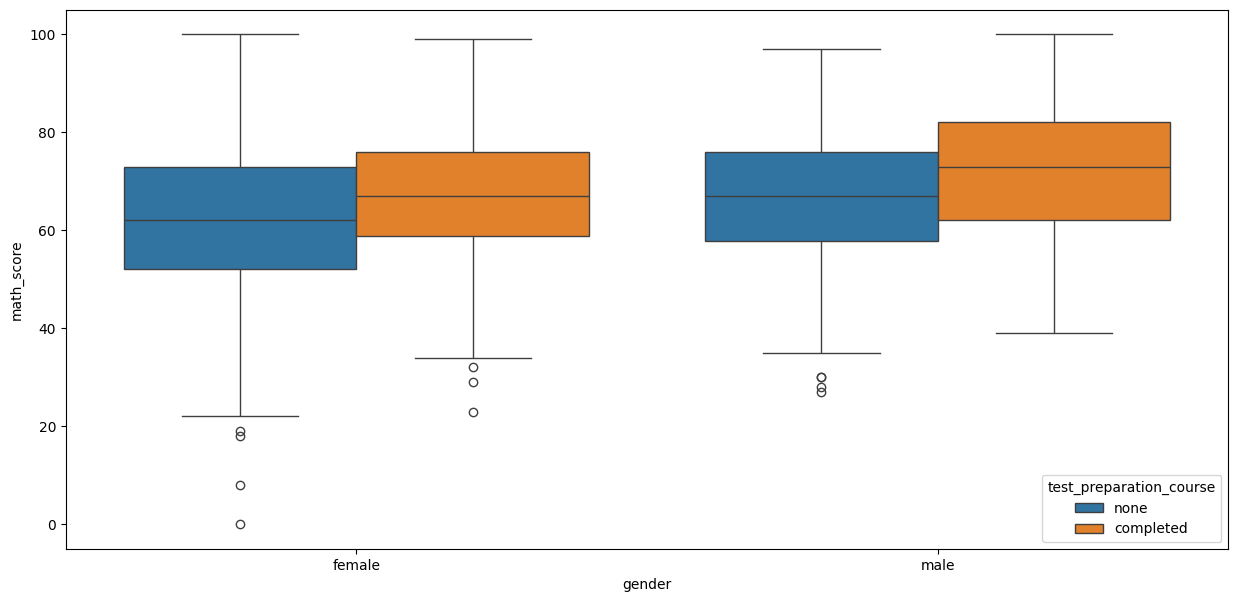

In [94]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='gender', y='math_score', hue='test_preparation_course')

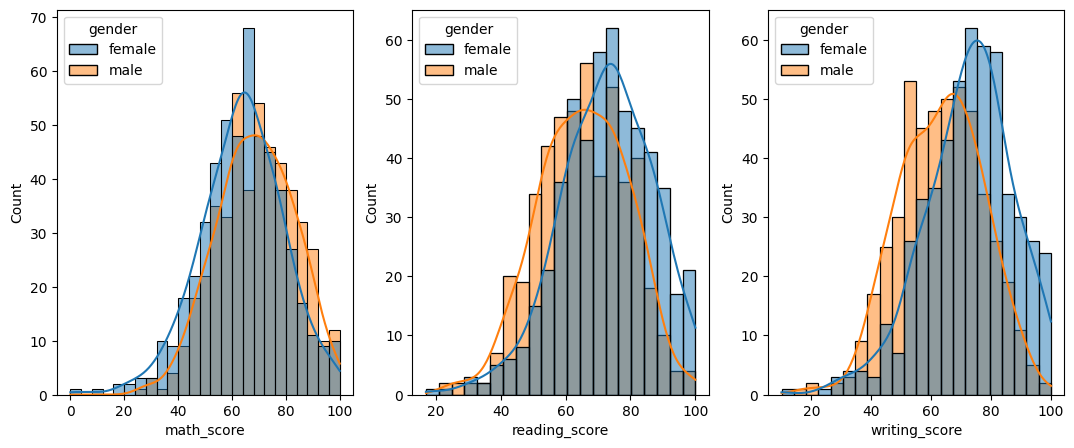

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
sns.histplot(data=df, x='math_score', kde=True, hue='gender', ax=ax[0])
sns.histplot(data=df, x='reading_score', kde=True, hue='gender', ax=ax[1])
sns.histplot(data=df, x='writing_score', kde=True, hue='gender', ax=ax[2])
plt.show()

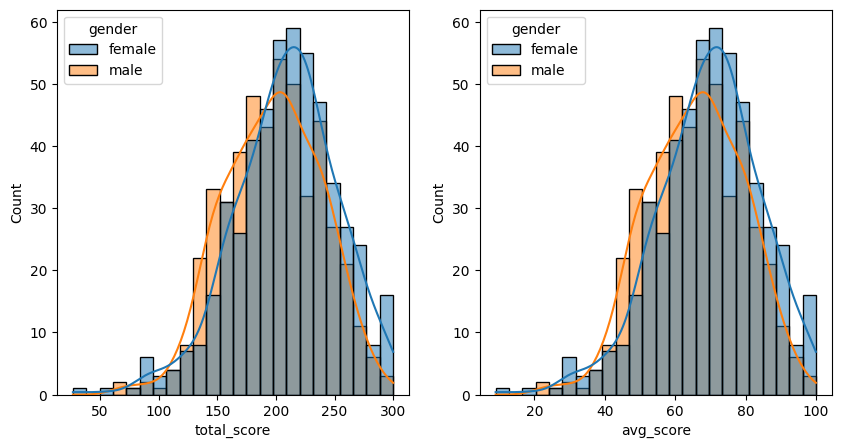

In [96]:
# gender over total and average score

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=ax[0])
sns.histplot(data=df, x='avg_score', kde=True, hue='gender', ax=ax[1])
plt.show()


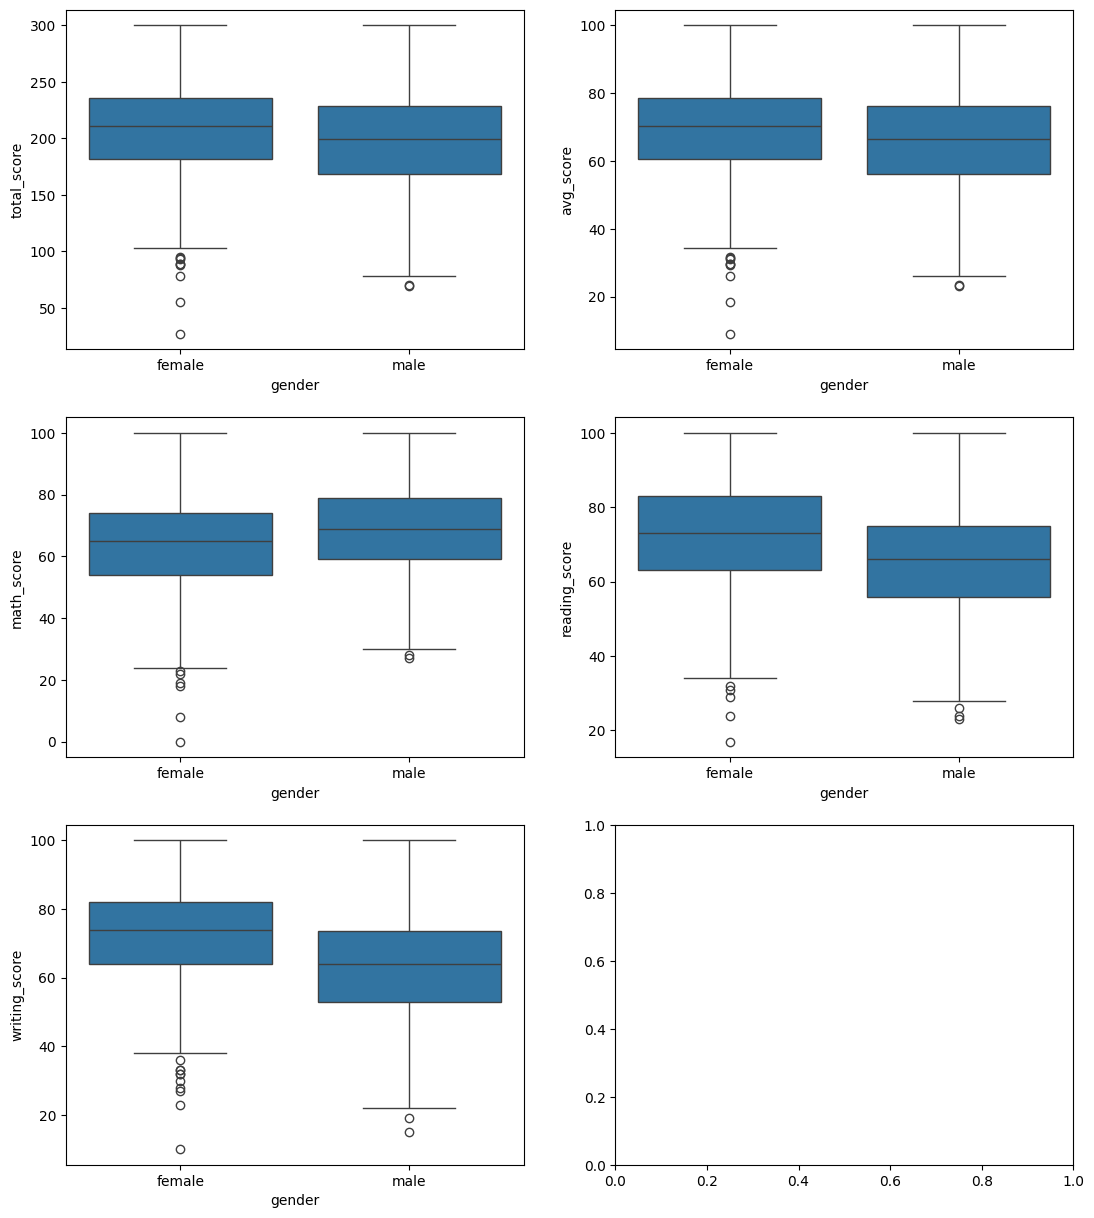

In [97]:
fig, ax = plt.subplots(3, 2, figsize=(13, 15))
sns.boxplot(x='gender', y='total_score', data=df, ax=ax[0, 0])
sns.boxplot(x='gender', y='avg_score', data=df, ax=ax[0, 1])
sns.boxplot(x='gender', y='math_score', data=df, ax=ax[1, 0])
sns.boxplot(x='gender', y='reading_score', data=df, ax=ax[1, 1])
sns.boxplot(x='gender', y='writing_score', data=df, ax=ax[2, 0])
plt.show()